In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../../data/tuition.csv")
import warnings
warnings.filterwarnings("ignore")

df.head()

,Academic Year,University of Minnesota Twin-Cities,Minnesota State 4-year universities,Minnesota 2-year Colleges,Private 4-year colleges
0,1970-1971,522.0,379.0,353.0,1671.0
1,1971-1972,525.0,416.0,386.0,1795.0
2,1972-1973,641.0,453.0,386.0,1933.0
3,1973-1974,683.0,458.0,420.0,2029.0
4,1974-1975,714.0,458.0,420.0,2203.0


In [35]:
df.rename({"Academic Year": "Year"}, axis=1, inplace=True)

In [36]:
df.dtypes

Year                                    object
University of Minnesota Twin-Cities    float64
Minnesota State 4-year universities    float64
Minnesota 2-year Colleges              float64
Private 4-year colleges                float64
dtype: object

In [37]:
# df.drop("Unnamed: 4", axis=1, inplace=True)

In [38]:
def replace_year(x):
    x=x.strip()
    current = x[:4]
    return current


df['Year'] = df['Year'].apply(replace_year)
df['Year'] = pd.to_datetime(df['Year']).dt.year
# df.dtypes
df = df.sort_values(by=["Year"]).reset_index(drop=True)
df.head()

,Year,University of Minnesota Twin-Cities,Minnesota State 4-year universities,Minnesota 2-year Colleges,Private 4-year colleges
0,1970,522.0,379.0,353.0,1671.0
1,1971,525.0,416.0,386.0,1795.0
2,1972,641.0,453.0,386.0,1933.0
3,1973,683.0,458.0,420.0,2029.0
4,1974,714.0,458.0,420.0,2203.0


In [39]:
# df['Year'] = pd.to_datetime(df['Year']).dt.year
df.dtypes

Year                                     int32
University of Minnesota Twin-Cities    float64
Minnesota State 4-year universities    float64
Minnesota 2-year Colleges              float64
Private 4-year colleges                float64
dtype: object

In [40]:
df.head()

,Year,University of Minnesota Twin-Cities,Minnesota State 4-year universities,Minnesota 2-year Colleges,Private 4-year colleges
0,1970,522.0,379.0,353.0,1671.0
1,1971,525.0,416.0,386.0,1795.0
2,1972,641.0,453.0,386.0,1933.0
3,1973,683.0,458.0,420.0,2029.0
4,1974,714.0,458.0,420.0,2203.0


In [41]:
df.isna().sum()

Year                                   0
University of Minnesota Twin-Cities    0
Minnesota State 4-year universities    0
Minnesota 2-year Colleges              0
Private 4-year colleges                0
dtype: int64

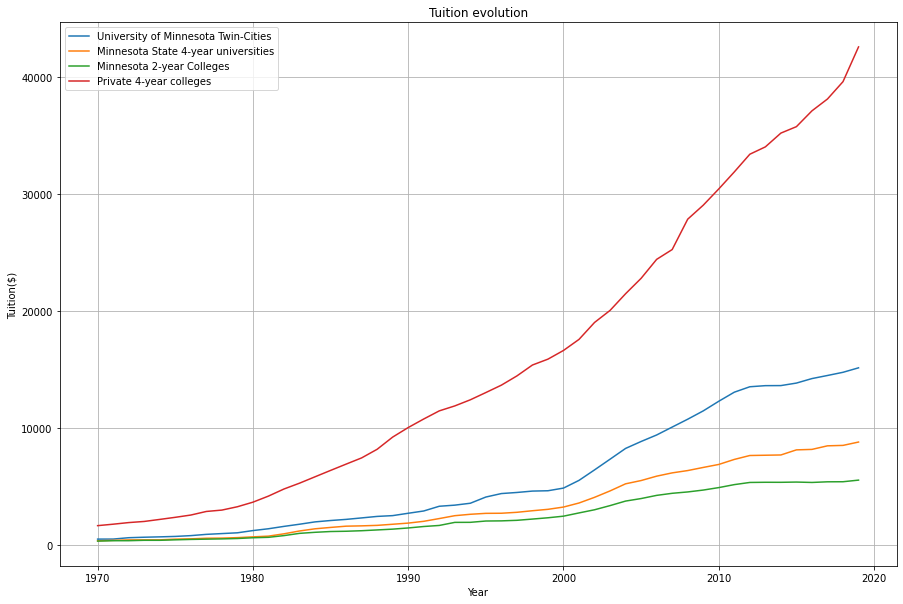

In [42]:
fig, ax = plt.subplots(figsize=(15,10))
for columns in df.columns.to_list()[1:]:   
    sns.lineplot(data=df, x="Year", y=columns, label=columns)

plt.xlabel('Year')
plt.ylabel('Tuition($)')
plt.title('Tuition evolution')

plt.grid()
plt.legend()
plt.show()

- overall, Private Non profit 4-year has the highest tuition fee. 
- public two year and private two years even though same length of education differ when it comes to tuition fee.
- the three types of tuition fees have an ascending trend 
- private 4-years has the biggest growth if we compare the first value to the last value for the three of them and public two years has the lowest. 
- 

In [43]:
df.describe()

,Year,University of Minnesota Twin-Cities,Minnesota State 4-year universities,Minnesota 2-year Colleges,Private 4-year colleges
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,1994.50000,5743.820000,3498.080000,2505.300000,15930.580000
std,14.57738,4966.614593,2813.717853,1854.283615,12438.595572
min,1970.00000,522.000000,379.000000,353.000000,1671.000000
25%,1982.25000,1654.000000,1034.500000,869.000000,4923.000000
50%,1994.50000,3848.000000,2681.000000,2010.000000,12721.500000
75%,2006.75000,9915.500000,6105.000000,4387.750000,25027.750000
max,2019.00000,15142.000000,8807.000000,5557.000000,42533.000000


In [44]:
import plotly.express as px

# Assuming df is your DataFrame containing the data
fig = px.line(df, x="Year", y=df.columns[1:], title="Tuition trend", labels={'Year': 'Year', 'value': 'Tuition($)'}, width=900, height=700)
fig.update_layout(xaxis_title='Year', yaxis_title='Tuition($)', legend_title='')


fig.show()
fig.write_html("../../graphs/html/four.html")
